In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
from bertopic import BERTopic
from wordcloud import WordCloud

In [17]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.010999917984008789
{'id': 'EJ1013917', 'title': 'Enhancing the Autonomous Use of CALL: A New Curriculum Model in EFL', 'author': 'Smith, Karen, Craig, Hana', 'description': "This action research study evaluates the effectiveness of a CALL Learner Autonomy (CALL LA) course at a Japanese university. The &quot;C course&quot; blends face-to-face instruction and independent study in a CALL environment. It aims to enhance learners' autonomous use of CALL in the acquisition of English as a Foreign Language (EFL). In this study, three learning support aids were trialed: the Learner Passport, the e-Language Learning Portfolio and the e-Learner Self-Reflection Diary. The participant- researchers examined the course using data from the trial materials, observation, their own reflexive practice, learner questionnaires, interviews, artifacts and learner self-reflections. Findings indicate that teachers' and learners' consciousness was raised a

In [18]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.002998828887939453


In [19]:
model = BERTopic(verbose=True, embedding_model="all-MiniLM-L6-v2")
#embeddingmodel embedding_model="all-MiniLM-L6-v2" or embedding_mode="all-mpnet-base-v2"
docs = df.title.to_list()
pub_dates = df.publicationdateyear.to_list()
topics, probabilities = model.fit_transform(docs)
topics_over_time = model.topics_over_time(docs, pub_dates)
model.get_topic_info()

Batches: 100%|██████████| 39/39 [00:07<00:00,  5.52it/s]
2023-06-18 07:40:06,929 - BERTopic - Transformed documents to Embeddings
2023-06-18 07:40:10,372 - BERTopic - Reduced dimensionality
2023-06-18 07:40:10,421 - BERTopic - Clustered reduced embeddings
12it [00:00, 50.78it/s]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,363,-1_of_and_in_learning,"[of, and, in, learning, learners, the, languag...",[Second Language Teachers&apos; Identity Devel...
1,0,87,0_technology_language_learning_teachers,"[technology, language, learning, teachers, ass...",[Technologies for Foreign Language Learning: A...
2,1,65,1_call_research_sla_the,"[call, research, sla, the, of, teacher, in, fr...",[Design for CALL--Possible Synergies between C...
3,2,61,2_data_corpus_driven_collocation,"[data, corpus, driven, collocation, dictionari...",[Discovering Collocations via Data-Driven Lear...
4,3,55,3_writing_feedback_automated_corrective,"[writing, feedback, automated, corrective, eva...",[Impact of Automated Writing Evaluation on Tea...
5,4,52,4_mobile_learning_assisted_language,"[mobile, learning, assisted, language, smartph...",[Mobile-Assisted Language Learning: A Duolingo...
6,5,50,5_collaborative_writing_wiki_mediated,"[collaborative, writing, wiki, mediated, wikis...",[Effects of computer-mediated collaborative wr...
7,6,44,6_pronunciation_speech_training_recognition,"[pronunciation, speech, training, recognition,...",[Automatic pronunciation assessment vs. automa...
8,7,43,7_multimodal_videoconferencing_video_conferencing,"[multimodal, videoconferencing, video, confere...",[Multimodal Language Learner Interactions via ...
9,8,41,8_game_games_digital_playing,"[game, games, digital, playing, gaming, play, ...",[Learner Interaction in a Massively Multiplaye...


In [20]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

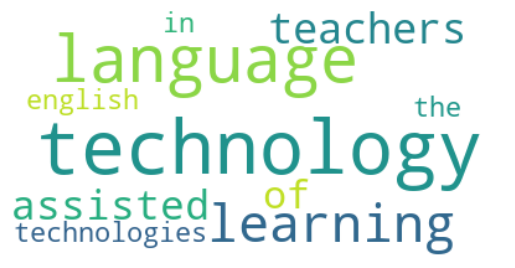

In [21]:
create_wordcloud(model, topic=0)

In [22]:
model.visualize_topics()

In [31]:
topics_to_include = list(range(0, 25))
model.visualize_barchart(topics= topics_to_include, width=300)

In [32]:
model.visualize_hierarchy()

In [33]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 292.73it/s]


In [34]:
model.visualize_heatmap()

In [38]:
model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [39]:
model.visualize_topics_over_time(topics_over_time, topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [40]:
model.visualize_topics_over_time(topics_over_time, topics=[20, 21, 22, 23, 24, 25])
#COVID-19 Topic


In [41]:
model.visualize_topics_over_time(topics_over_time)

In [42]:
#Extract topics-document assignments
document_topics = []
for i, topic in enumerate(topics):
    document_id = df.loc[i, 'id']
    document_title = df.loc[i, 'title']
    document_topics.append({'id': document_id, 'title': document_title, 'topic': topic})
    #Export to JSON
with open('miniLM_titles_topics.json', 'w') as f:
    json.dump(document_topics, f)